## Data Visualization and Plotting

### Needed Libraries 

In [14]:
import pickle
from statistics import mean, stdev
import shutil
import matplotlib.pyplot as plt
from tqdm import tqdm

### Plotting Function 

In [15]:
def plot_avg_std(data_bf, data_ckf, data_org, plot_title, x_axis_vals, fpp_rate):
    plt.figure(figsize=(8,5))
    x = range(1, len(data_bf) + 1)  # X-axis values
    avg_bf = [item[0] for item in data_bf]  # Average values from tuples
    std_bf = [item[1] for item in data_bf]  # Standard deviation values from tuples
    
    avg_ckf = [item[0] for item in data_ckf]  # Average values from tuples
    std_ckf = [item[1] for item in data_ckf]  # Standard deviation values from tuples
    
    avg_org = [item[0] for item in data_org]  # Average values from tuples
    std_org = [item[1] for item in data_org]  # Standard deviation values from tuples
    
    # Plotting
    plt.errorbar(x, avg_bf, yerr=std_bf, fmt='o', capsize=4, color='Green')
    plt.errorbar(x, avg_ckf, yerr=std_ckf, fmt='o', capsize=4, color='Orange')
    plt.errorbar(x, avg_org, yerr=std_org, fmt='o', capsize=4, color='Red')
    plt.xlabel(f'Total of Transactions per Test', size=15)
    plt.ylabel('Time Needed per\n Operation (MiliSeconds)', size=15)

    plt.title(f'{plot_title}', size=20)
    
    xticks_values = x_axis_vals
    plt.xticks(x, xticks_values)
    plt.legend(['Bloom Filter', 'Cuckoo Filter', 'Without Filter'], loc=2)
    fig_title = ''.join(plot_title.split())
    file_name = fig_title+'_'+fpp_rate
    plt.savefig(f'{file_name}.png')
    plt.show()  
    
def plot_total_time(bf_data, ckf_data, org_data, plot_title, x_axis_vals, fpp_rate):
    plt.figure(figsize=(8,5))
    
    # Plotting
    plt.plot(bf_data,  color = 'Green', linestyle='--')
    plt.plot(ckf_data, color = 'Orange', linestyle='--')
    plt.plot(org_data, color = 'Red', linestyle='--')
    plt.xlabel(f'Total of Transactions per Test', size=15)
    plt.ylabel('Time Needed (Seconds)\nper Operation', size=15)

    plt.title(f'{plot_title}', size=20)
    
    xticks_values = x_axis_vals
    plt.xticks(range(len(xticks_values)), xticks_values)
    plt.legend(['Bloom Filter', 'Cuckoo Filter', 'Without Filter'], loc=2)
    fig_title = ''.join(plot_title.split())
    file_name = fig_title+'_'+fpp_rate
    plt.savefig(f'{file_name}.png')
    plt.show()    

### Test Configurations 

In [16]:
unit = 1000

insert_ranges       = [100000,  150000, 200000, 250000,  300000,   350000]
insert_ranges_ticks = ['100k',  '150k', '200k', '250k',  '300k',   '350k']
query_del_ranges    = ['10k',     '15k',  '20k',  '25k',   '30k',   '35k'] 

### Loading and Processing Data 

In [17]:
with open('query_bef_results_org', 'rb') as b:
    loaded_query_bef_results_org = pickle.load(b)
    
with open('deletion_results_org', 'rb') as b:
    loaded_deletion_results_org = pickle.load(b)
    
with open('query_aft_results_org', 'rb') as b:
    loaded_query_aft_results_org = pickle.load(b)
    
with open('query_bef_results_bfckf', 'rb') as b:
    loaded_query_bef_results_bfckf = pickle.load(b)
    
with open('deletion_results_bfckf', 'rb') as b:
    loaded_deletion_results_bfckf = pickle.load(b)
    
with open('query_aft_results_bfckf', 'rb') as b:
    loaded_query_aft_results_bfckf = pickle.load(b)

In [18]:
org_avg_std_bef = [(mean(val[0])*unit,stdev(val[0])*unit) for key, val in loaded_query_bef_results_org.items()] 
org_avg_std_del = [(mean(val[0])*unit,stdev(val[0])*unit) for key, val in loaded_deletion_results_org.items()] 
org_avg_std_aft = [(mean(val[0])*unit,stdev(val[0])*unit) for key, val in loaded_query_aft_results_org.items()] 

bloom_avg_std_bef = [(mean(val[0])*unit,stdev(val[0])*unit) for key, val in loaded_query_bef_results_bfckf.items()] 
bloom_avg_std_del = [(mean(val[0])*unit,stdev(val[0])*unit) for key, val in loaded_deletion_results_bfckf.items() ] 
bloom_avg_std_aft = [(mean(val[0])*unit,stdev(val[0])*unit) for key, val in loaded_query_aft_results_bfckf.items()] 

cuckoo_avg_std_bef = [(mean(val[1])*unit,stdev(val[1])*unit) for key, val in loaded_query_bef_results_bfckf.items()]
cuckoo_avg_std_del = [(mean(val[1])*unit,stdev(val[1])*unit) for key, val in loaded_deletion_results_bfckf.items()]
cuckoo_avg_std_aft = [(mean(val[1])*unit,stdev(val[1])*unit) for key, val in loaded_query_aft_results_bfckf.items()]

### Result Visualization

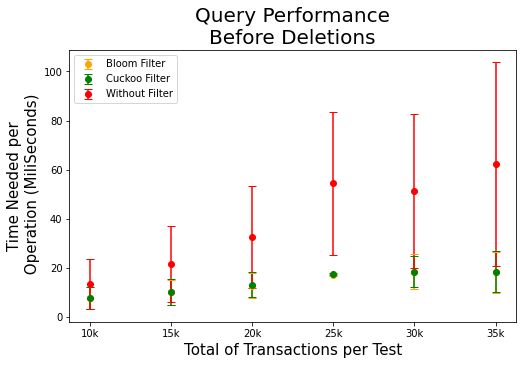

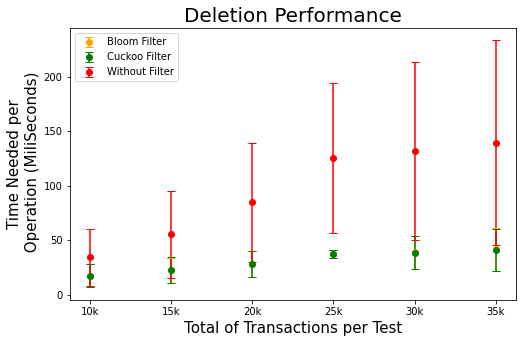

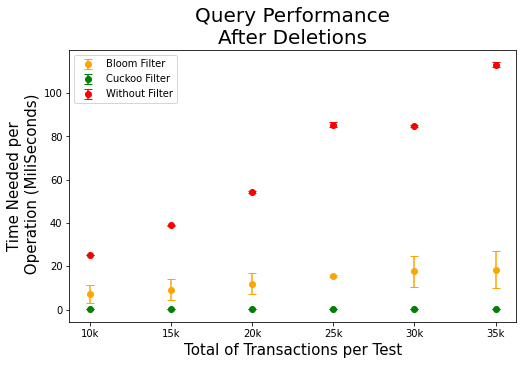

In [19]:
plot_avg_std(bloom_avg_std_bef, 
             cuckoo_avg_std_bef,
             org_avg_std_bef, 
             'Query Performance\nBefore Deletions', 
             query_del_ranges, 
             '10percent_errorbar')

plot_avg_std(bloom_avg_std_del, 
             cuckoo_avg_std_del, 
             org_avg_std_del, 
             'Deletion Performance', 
             query_del_ranges, 
             '10percent_errorbar')

plot_avg_std(bloom_avg_std_aft, 
             cuckoo_avg_std_aft, 
             org_avg_std_aft, 
             'Query Performance\nAfter Deletions', 
             query_del_ranges, 
             '10percent_errorbar')

## Total Elapsed Time Measuring 

### Load Data 

In [20]:
with open('3 Kind Test Results/insert_results_bckor_10', 'rb') as b:
    insertion_results = pickle.load(b)

with open('3 Kind Test Results/query_bef_results_bckor_10', 'rb') as b:
    query_bef_results = pickle.load(b)
    
with open('3 Kind Test Results/deletion_results_bckor_10', 'rb') as b:
    deletion_results = pickle.load(b)
    
with open('3 Kind Test Results/query_aft_results_bckor_10', 'rb') as b:
    query_aft_results = pickle.load(b)

In [21]:
insertion_results

{'100000': (7.8850977420806885, 9.157479763031006, 7.813189744949341),
 '150000': (11.925579309463501, 14.016395092010498, 11.80326509475708),
 '200000': (16.002779483795166, 19.032130002975464, 15.713669776916504),
 '250000': (20.192859411239624, 24.02267599105835, 19.615140676498413),
 '300000': (24.188144207000732, 29.169653177261353, 23.784144401550293),
 '350000': (28.37477731704712, 34.07792401313782, 27.580214023590088)}

In [22]:
query_bef_results

{'100000': (41.78251075744629, 41.55080556869507, 63.38034415245056),
 '150000': (80.01852321624756, 80.47619199752808, 182.48651123046875),
 '200000': (140.05579447746277, 137.7727825641632, 339.73763489723206),
 '250000': (225.70671677589417, 222.63870978355408, 571.6206130981445),
 '300000': (289.93022203445435, 285.25392270088196, 868.2875294685364),
 '350000': (367.9630591869354, 358.2193465232849, 1176.3434739112854)}

In [23]:
deletion_results

{'100000': (104.06921625137329, 103.59611415863037, 135.06933164596558),
 '150000': (201.41639399528503, 199.97656106948853, 407.7312614917755),
 '200000': (345.1837224960327, 359.6120994091034, 818.4428205490112),
 '250000': (563.6970736980438, 566.185720205307, 1365.9058527946472),
 '300000': (722.6884391307831, 745.0585465431213, 2087.1571583747864),
 '350000': (992.657742023468, 928.5548927783966, 3153.2003960609436)}

In [24]:
query_aft_results

{'100000': (37.106380462646484, 1.2529823780059814, 112.88155221939087),
 '150000': (72.4350655078888, 2.7307331562042236, 320.2902195453644),
 '200000': (126.15462255477905, 4.890831470489502, 623.0987455844879),
 '250000': (203.79411792755127, 7.805828332901001, 1032.0651683807373),
 '300000': (263.37373208999634, 12.020766735076904, 1536.981328010559),
 '350000': (330.52954840660095, 16.71712040901184, 2150.970017671585)}

## Test Data Visualization 
 

In [25]:
bf_inserts  = [val[0] for key,val in insertion_results.items()]
ckf_inserts = [val[1] for key,val in insertion_results.items()]
org_inserts = [val[2] for key,val in insertion_results.items()]

bf_bef_query  = [val[0] for key,val in query_bef_results.items()]
ckf_bef_query = [val[1] for key,val in query_bef_results.items()]
org_bef_query = [val[2] for key,val in query_bef_results.items()]

bf_deletions  = [val[0] for key,val in deletion_results.items()]
ckf_deletions = [val[1] for key,val in deletion_results.items()]
org_deletions = [val[2] for key,val in deletion_results.items()]

bf_aft_query  = [val[0] for key,val in query_aft_results.items()]
ckf_aft_query = [val[1] for key,val in query_aft_results.items()]
org_aft_query = [val[2] for key,val in query_aft_results.items()]

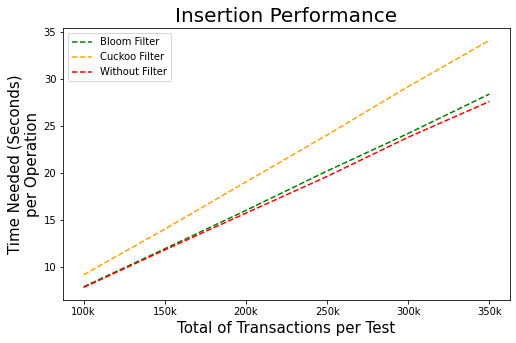

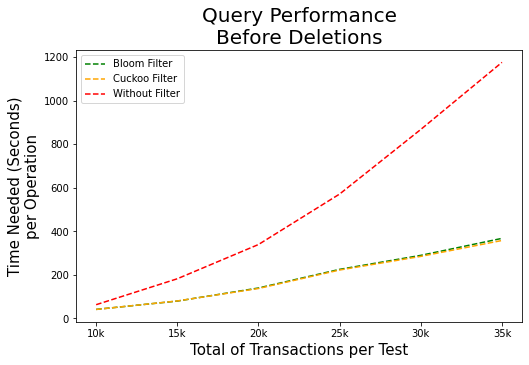

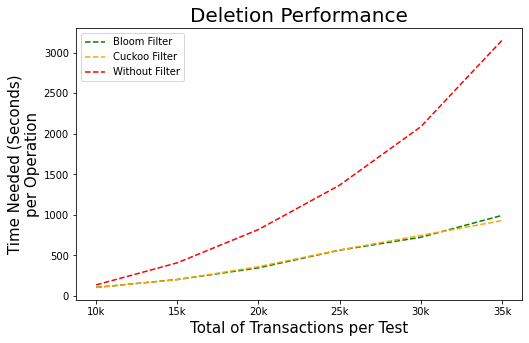

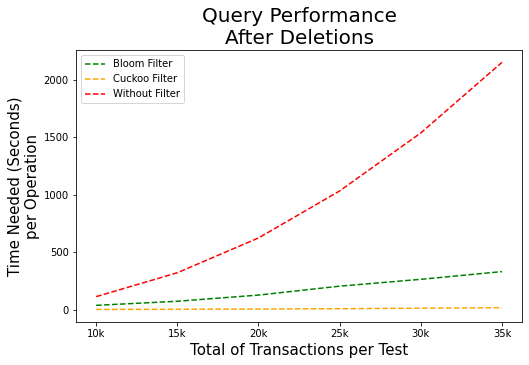

In [26]:
plot_total_time(bf_inserts,   ckf_inserts, org_inserts,     'Insertion Performance',            insert_ranges_ticks, '10percent_plot')
plot_total_time(bf_bef_query, ckf_bef_query, org_bef_query, 'Query Performance\nBefore Deletions', query_del_ranges, '10percent_plot')
plot_total_time(bf_deletions, ckf_deletions, org_deletions, 'Deletion Performance',                query_del_ranges, '10percent_plot')
plot_total_time(bf_aft_query, ckf_aft_query, org_aft_query, 'Query Performance\nAfter Deletions',  query_del_ranges, '10percent_plot')